C03 - Ascending to the 3D World
===============================

In [1]:
%load_ext autoreload
%autoreload 2

In [120]:
from draw3d import *
from vectors import length, to_polar
from math import sin, cos, pi, acos

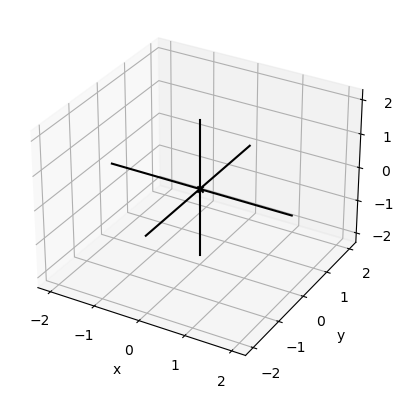

In [3]:
draw3d()

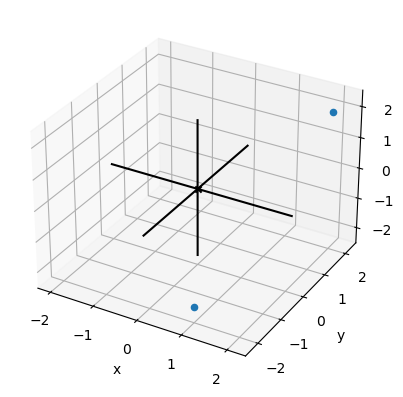

In [4]:
# 3.1.2 3D drawing with Python

draw3d(
    Points3D((2,2,2), (1,-2,-2), color=blue)
)



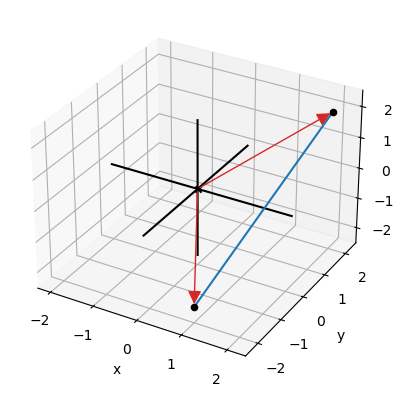

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

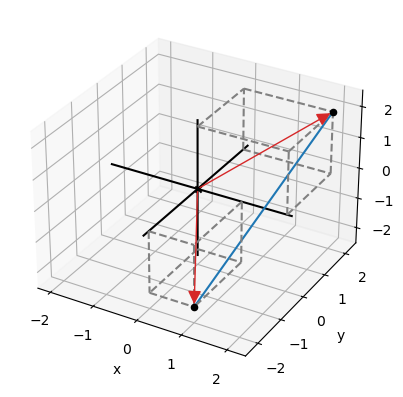

In [6]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)


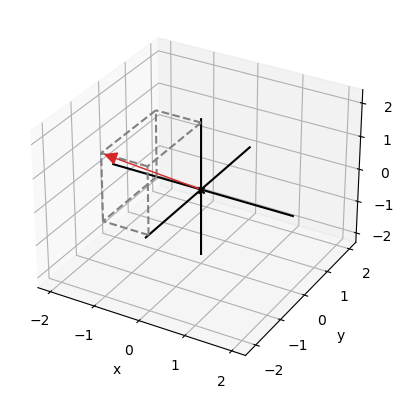

In [7]:
# Exercise 3.1
p = (-1,-2,2)
draw3d(
    Arrow3D(p),
    Box3D(*p)
)

((-1, 1, 1), (1, 1, 1))
((-1, 1, -1), (1, 1, -1))
((-1, -1, 1), (1, -1, 1))
((-1, -1, -1), (1, -1, -1))
((1, -1, 1), (1, 1, 1))
((1, -1, -1), (1, 1, -1))
((-1, -1, 1), (-1, 1, 1))
((-1, -1, -1), (-1, 1, -1))
((1, 1, -1), (1, 1, 1))
((1, -1, -1), (1, -1, 1))
((-1, 1, -1), (-1, 1, 1))
((-1, -1, -1), (-1, -1, 1))


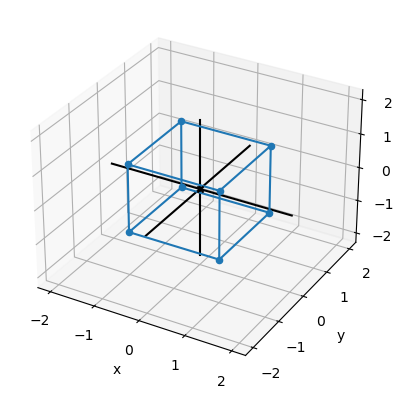

In [8]:
# Exercise 3.2
pm1 = [1, -1]

vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z), (1,y,z)) for y in pm1 for z in pm1] + \
        [((x,-1,z), (x,1,z)) for x in pm1 for z in pm1] + \
        [((x,y,-1), (x,y,1)) for x in pm1 for y in pm1]

for edge in edges:
    print(edge)

draw3d(
    Points3D(*vertices, color=blue),    
    *[Segment3D(*edge) for edge in edges]
)
        

### 3.2 Vector arithmetic in 3D

v=(2, 1, 1)
v=(1, 2, 2)
v=(3, 3, 3)


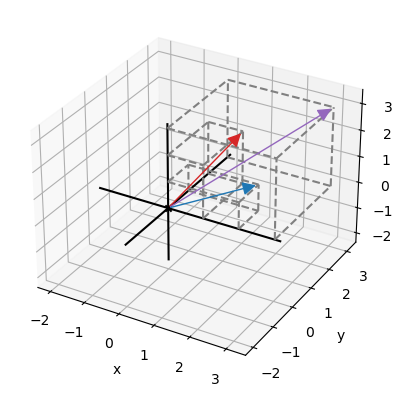

In [9]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

a = (2,1,1)
b = (1,2,2)
c = add(a, b)

for v in [a,b,c]:
    print(f"{v=}")

draw3d(
    Arrow3D(a, color=blue),
    Box3D(*a),
    Arrow3D(b, color=red),
    Box3D(*b),
    Arrow3D(c, color=purple),
    Box3D(*c)
)

v=(1, 1, 3)
v=(2, 4, -4)
v=(4, 2, -2)
v=(7, 7, -3)


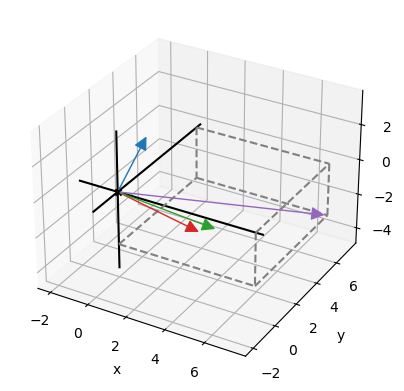

In [10]:
a = (1,1,3)
b = (2,4,-4)
c = (4,2,-2)
d = add(a,b,c)

for v in [a,b,c,d]:
    print(f"{v=}")

draw3d(
    Arrow3D(a, color=blue),
    # Box3D(*a),
    Arrow3D(b, color=red),
    # Box3D(*b),
    Arrow3D(c, color=green),
    # Box3D(*c),
    Arrow3D(d, color=purple),
    Box3D(*d)
)

i=(-1, -3, 3)
i=(3, 2, 4)
i=[-4, -5, -1]


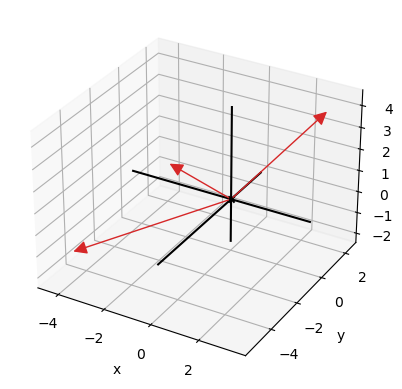

In [11]:
# Subtracting 3D vectors
from functools import reduce

v = (-1, -3, 3)
w = (3, 2, 4)

def subtract(*vectors):
    return [reduce(lambda a,b: a-b, coords) for coords in zip(*vectors)]

u = subtract(v, w)

for i in [v, w, u]:
    print(f"{i=}")

draw3d(
    *[Arrow3D(i) for i in [v,w,u]]
)

In [15]:
# 3.2.4 Computing lengths and distances
p = ((3,4, 12))
length(p)

13.0

In [ ]:
# 3.2.5 Computing angles and directions
# - spherical coordiates

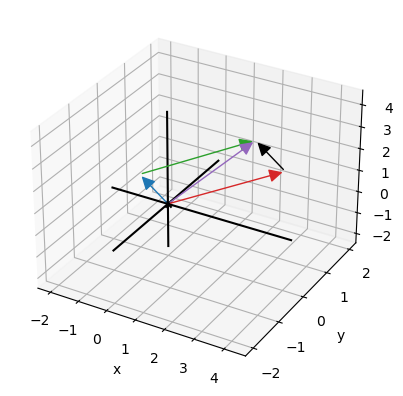

In [35]:
# Exercise 3.3

a = (4,0,3)
b = (-1,0,1)
c = add(a, b)

draw3d(
    Arrow3D(a, color=red),
    Arrow3D(b, color=blue),
    Arrow3D(c,b, color=green),
    Arrow3D(c,a, color=black),
    Arrow3D(c, color=purple)
    
)

In [37]:
# Exercise 3.4
vectors1 = [(1,2,3,4,5), (6,7,8,9,10)]
print(list(zip(*vectors1)))

vectors2 = [(1,2), (3,4), (5,6), (7,8)]
print(list(zip(*vectors2)))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
[(1, 3, 5, 7), (2, 4, 6, 8)]


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


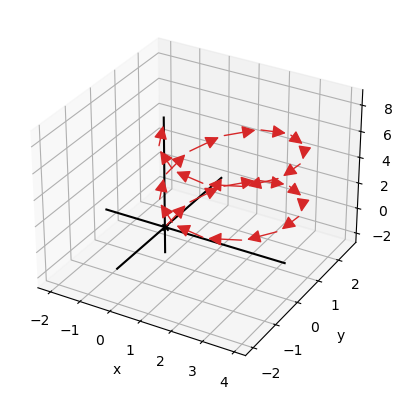

In [44]:
# Exercise 3.5
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]
vs

running_sum = (0,0,0)
arrows=[]

for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum

print(running_sum)
draw3d(*arrows)

In [47]:
# Exercise 3.6
def scale(scalar, v):
    return tuple(scalar * coord for coord in v)

print(scale(3, (3,2,-2)))


(9, 6, -6)


i=(1, -1, -1)
i=(0, 0, 2)
i=(0.5, -0.5, 0.5)


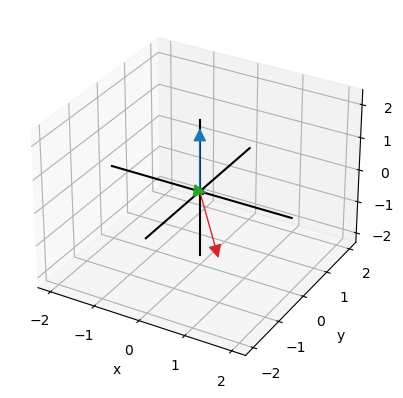

In [51]:
u = (1,-1,-1)
v = (0,0,2)

w = add(u, scale(0.5, subtract(v,u)))

for i in [u,v,w]:
    print(f"{i=}")

draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue),
    Arrow3D(w, color=green),
)

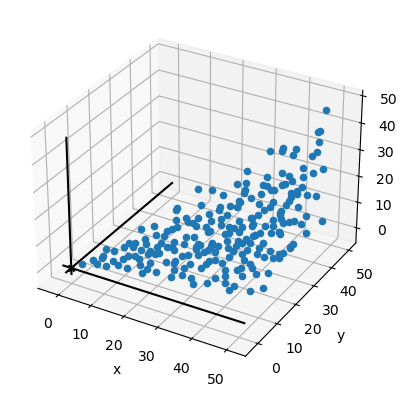

In [59]:
# Exercise 3.9

def vectors_with_int_number_length(max_coord=100):
    for x in range(1, max_coord):
        for y in range(1, x+1):
            for z in range(1, y+1):
                if length((x,y,z)).is_integer():
                          yield(x,y,z)
                          
draw3d(
    *[Points3D(v, color=blue) for v in vectors_with_int_number_length(50)]
)
                        

In [61]:
# 3.3.1 - Picturing the dot product
# - inner product

a=(1, 2, -1)
b=(3, 0, 3)
dot_prod=0


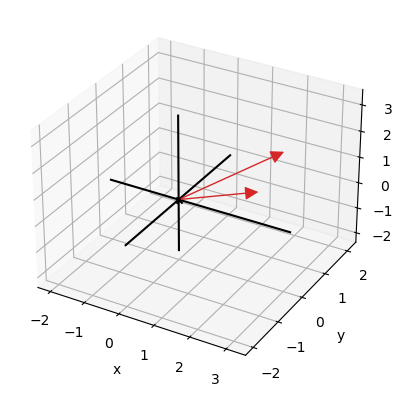

In [71]:
# 3.3.2 Computing the dot product
a = (1,2,-1)
b = (3,0,3)

dot_prod = sum([i * j for i, j in zip(a,b)])

print(f"{a=}")
print(f"{b=}")
print(f"{dot_prod=}")

draw3d(
    Arrow3D(a),
    Arrow3D(b)
)

In [73]:
def dot(v1, v2):
    return sum([i * j for i, j in zip(v1,v2)])

print(dot((1,3,3), (2,2,-4)))

-4


In [77]:
print(dot((1,0),(0,2)))
print(dot((0,3,0),(0,0,-5)))

0
0


In [81]:
a = (3,4)
b = (2,3)

print(dot(a,b))
print(dot(scale(2,a), b))
print(dot(a, scale(2,b)))

18
36
36


In [82]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [100]:
def angle_between(v1, v2):
    
    return acos(dot(v1,v2) / (length(v1) * length(v2)))

print(angle_between(a,b) * 180 * pi)

31.38366534572786


In [108]:
from itertools import combinations

w = (-4,1)
v = (1,2)
u = (4,2)


for i, j in combinations(["u","v", "w"],2):
    print(f"{i} . {j} => {globals()[i]} . {globals()[j]} => {dot(globals()[i],globals()[j])}")

u . v => (4, 2) . (1, 2) => 8
u . w => (4, 2) . (-4, 1) => -14
v . w => (1, 2) . (-4, 1) => -2


In [109]:
# Exercise 3.12

u = (-4,1)
v = (1,2)



for i, j in combinations(["u","v"],2):
    print(f"{i} . {j} => {globals()[i]} . {globals()[j]} => {dot(globals()[i],globals()[j])}")

u . v => (-4, 1) . (1, 2) => -2


In [118]:
# Exercise 3.16
ud = 3.61
vd = 1.44
angle_deg = 101.3

dp = ud * vd * cos(angle_deg * pi / 180)
print(f"{dp=:0.4}")


dp=-1.019


In [128]:
# Exercise 3.17
r1, t1 = to_polar((4,3))
r2, t2 = to_polar((3,4))

print(f"{r1=} {t1=}")
print(f"{r2=} {t2=}")

print(f"{t2-t1=:0.3}")

r1=5.0 t1=0.6435011087932844
r2=5.0 t2=0.9272952180016122
t2-t1=0.284


In [134]:
# Exercise 3.18
a = (1,1,1)
b = (-1,-1,1)

print(f"{length(a)=}")

print(f"{angle_between(a,b) * 180 / pi=:0.4}")

length(a)=1.7320508075688772
angle_between(a,b) * 180 / pi=109.5
